In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

# from scipy.stats import binned_statistic_2d
# from scipy.ndimage import gaussian_filter
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
import matplotlib
import matplotlib.cm as cm

# from abacusnbody.analysis.tsc import tsc_parallel
import time

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# Import packages

sys.path.append('../src/')
# from filter_utils import *
# from SZstacker import SZMapStacker # type: ignore
from utils import ksz_from_delta_sigma

from stacker import SimulationStacker

import illustris_python as il

import yaml
import argparse
from pathlib import Path


In [2]:
# Define configuration explicitly
from tabnanny import verbose

# Extract configuration parameters

redshift = 0.4
loadField = False
saveField = False
radDistance = 1.0
pType = 'gas'
projection = 'yz'
radDistanceUnits = 'arcmin'
pixelSize = 0.05  # arcmin/pixel

maskHaloes = False
maskRadii = 3.0

sim_type = 'IllustrisTNG'
snapshot = 74
sim_name = 'L50n512_SB35'

# Plotting parameters

plotErrorBars = True
figName = 'DSigma_profiles_yz'

colourmaps = ['hot', 'cool']

sims = [0, 598, 580]

number_density = [2.4e-3, 1e-3, 5.4e-4, 2.8e-4, 1e-4]


t0 = time.time()




# Cumulative Ratio

In [12]:

# Get colormap
colourmap = matplotlib.colormaps[colourmaps[0]]
colours = [colourmap(0.5)]  # Single color since we have one simulation

if verbose:
    print(f"Processing simulation of type: {sim_type}")

profiles0_all_sims = []
profiles1_all_sims = []
OmegaBaryons = []
OmegaMatters = []

for s in sims:
    print(f"Processing simulation: {sim_name} simulation {s}")

    stacker = SimulationStacker(s, snapshot, 
                        simType=sim_type)
    stacker_tot = SimulationStacker(s, snapshot, 
                                simType=sim_type)

    OmegaBaryons.append(stacker.header['OmegaBaryon'])
    OmegaMatters.append(stacker.header['Omega0'])
    
    ## Corresponding to halo number in 50 Mpc/h box: [25, 68, 75, 125, 300]
    profiles0_all = []
    profiles1_all = []
    for n_density in number_density:
        radii0, profiles0 = stacker.stackMap('gas', filterType='cumulative', minRadius=1.0, maxRadius=6.0,
                                            save=saveField, load=loadField, radDistance=radDistance, halo_number_density=n_density,
                                            projection=projection,pixelSize=pixelSize)
        radii1, profiles1 = stacker_tot.stackMap('total', filterType='cumulative', minRadius=1.0, maxRadius=6.0,
                                                save=saveField, load=loadField, radDistance=radDistance, halo_number_density=n_density,
                                                projection=projection, mask=maskHaloes, maskRad=maskRadii, pixelSize=pixelSize)

        profiles0_all.append(profiles0)
        profiles1_all.append(profiles1)

    profiles0_all_sims.append(profiles0_all)
    profiles1_all_sims.append(profiles1_all)


Processing simulation: L50n512_SB35 simulation 0
Box size: 50000.0 kpc/h , Map size at z=0.4674218694859129: 146.16 arcmin
Processed 0 snapshots, time elapsed: 1.87 seconds
Processed 0 snapshots, time elapsed: 1.87 seconds
Processed 10 snapshots, time elapsed: 22.38 seconds
Processed 10 snapshots, time elapsed: 22.38 seconds
Binned statistic time: 33.459383726119995
Binned statistic time: 33.459383726119995
Number of halos selected: 300 at Mass threshold:  2.92e+12 ~  2.78e+14 Msun/h
Number of halos selected: 300 at Mass threshold:  2.92e+12 ~  2.78e+14 Msun/h
Box size: 50000.0 kpc/h , Map size at z=0.4674218694859129: 146.16 arcmin
Box size: 50000.0 kpc/h , Map size at z=0.4674218694859129: 146.16 arcmin
Processed 0 snapshots, time elapsed: 1.88 seconds
Processed 0 snapshots, time elapsed: 1.88 seconds
Processed 10 snapshots, time elapsed: 23.03 seconds
Processed 10 snapshots, time elapsed: 23.03 seconds
Binned statistic time: 33.922773599624634
Binned statistic time: 33.9227735996246

In [5]:
mass_strings = [
    [
        f'n = {number_density[0]:.1e} (Mpc/h)$^{{-3}}$ (300 halos): 2.92e+12 ~ 2.78e+14 Msun/h',
        f'n = {number_density[1]:.1e} (Mpc/h)$^{{-3}}$ (125 halos): 7.74e+12 ~ 2.78e+14 Msun/h',
        f'n = {number_density[2]:.1e} (Mpc/h)$^{{-3}}$ (67 halos):  1.32e+13 ~ 2.78e+14 Msun/h',
        f'n = {number_density[3]:.1e} (Mpc/h)$^{{-3}}$ (35 halos):  2.01e+13 ~ 2.78e+14 Msun/h',
        f'n = {number_density[4]:.1e} (Mpc/h)$^{{-3}}$ (12 halos):  4.92e+13 ~ 2.78e+14 Msun/h'
    ],
    [
        f'n = {number_density[0]:.1e} (Mpc/h)$^{{-3}}$ (300 halos): 1.48e+11 ~ 2.74e+13 Msun/h',
        f'n = {number_density[1]:.1e} (Mpc/h)$^{{-3}}$ (125 halos): 3.10e+11 ~ 2.74e+13 Msun/h',
        f'n = {number_density[2]:.1e} (Mpc/h)$^{{-3}}$ (67 halos):  6.75e+11 ~ 2.74e+13 Msun/h',
        f'n = {number_density[3]:.1e} (Mpc/h)$^{{-3}}$ (35 halos):  1.45e+12 ~ 2.74e+13 Msun/h',
        f'n = {number_density[4]:.1e} (Mpc/h)$^{{-3}}$ (12 halos):  4.40e+12 ~ 2.74e+13 Msun/h'
    ],
    [
        f'n = {number_density[0]:.1e} (Mpc/h)$^{{-3}}$ (300 halos): 1.60e+12 ~ 1.44e+14 Msun/h',
        f'n = {number_density[1]:.1e} (Mpc/h)$^{{-3}}$ (125 halos): 3.89e+12 ~ 1.44e+14 Msun/h',
        f'n = {number_density[2]:.1e} (Mpc/h)$^{{-3}}$ (67 halos):  6.90e+12 ~ 1.44e+14 Msun/h',
        f'n = {number_density[3]:.1e} (Mpc/h)$^{{-3}}$ (35 halos):  1.14e+13 ~ 1.44e+14 Msun/h',
        f'n = {number_density[4]:.1e} (Mpc/h)$^{{-3}}$ (12 halos):  3.22e+13 ~ 1.44e+14 Msun/h'
    ]
]


In [5]:
# Save data in a format that handles variable array sizes
save_data = {}
save_data['radii0'] = radii0
save_data['number_density'] = number_density
save_data['sims'] = sims
save_data['mass_strings'] = np.array(mass_strings, dtype=object)

# Save tau and total profiles separately for each sim and density
for sim_idx, sim_id in enumerate(sims):
    for density_idx, density in enumerate(number_density):
        gas_key = f'gas_sim{sim_id}_density{density_idx}'
        total_key = f'total_sim{sim_id}_density{density_idx}'
        save_data[gas_key] = profiles0_all_sims[sim_idx][density_idx]
        save_data[total_key] = profiles1_all_sims[sim_idx][density_idx]

np.savez(
    f"CAMELS_{sim_name}_gas_cumulative_profiles_low_high_fiducial_feedback.npz",
    **save_data
) 


In [31]:
# Load the saved data
loaded_data = np.load(f"CAMELS_{sim_name}_gas_DSigma_profiles_low_high_fiducial_feedback.npz")

# Extract the basic arrays
radii0 = loaded_data['radii0']
number_density = loaded_data['number_density']
sims = loaded_data['sims']

# Reconstruct the profiles arrays
profiles0_all_sims = []
profiles1_all_sims = []

for sim_idx, sim_id in enumerate(sims):
    profiles0_all = []
    profiles1_all = []
    
    for density_idx, density in enumerate(number_density):
        gas_key = f'gas_sim{sim_id}_density{density_idx}'
        total_key = f'total_sim{sim_id}_density{density_idx}'
        
        profiles0_all.append(loaded_data[gas_key])
        profiles1_all.append(loaded_data[total_key])
    
    profiles0_all_sims.append(profiles0_all)
    profiles1_all_sims.append(profiles1_all)

print(f"Loaded data for {len(sims)} simulations with {len(number_density)} density bins")

Loaded data for 3 simulations with 5 density bins


(11, 300) (11, 300)
(11, 125) (11, 125)
(11, 67) (11, 67)
(11, 35) (11, 35)
(11, 12) (11, 12)
(11, 300) (11, 300)
(11, 125) (11, 125)
(11, 67) (11, 67)
(11, 35) (11, 35)
(11, 12) (11, 12)
(11, 300) (11, 300)
(11, 125) (11, 125)
(11, 67) (11, 67)
(11, 35) (11, 35)
(11, 12) (11, 12)


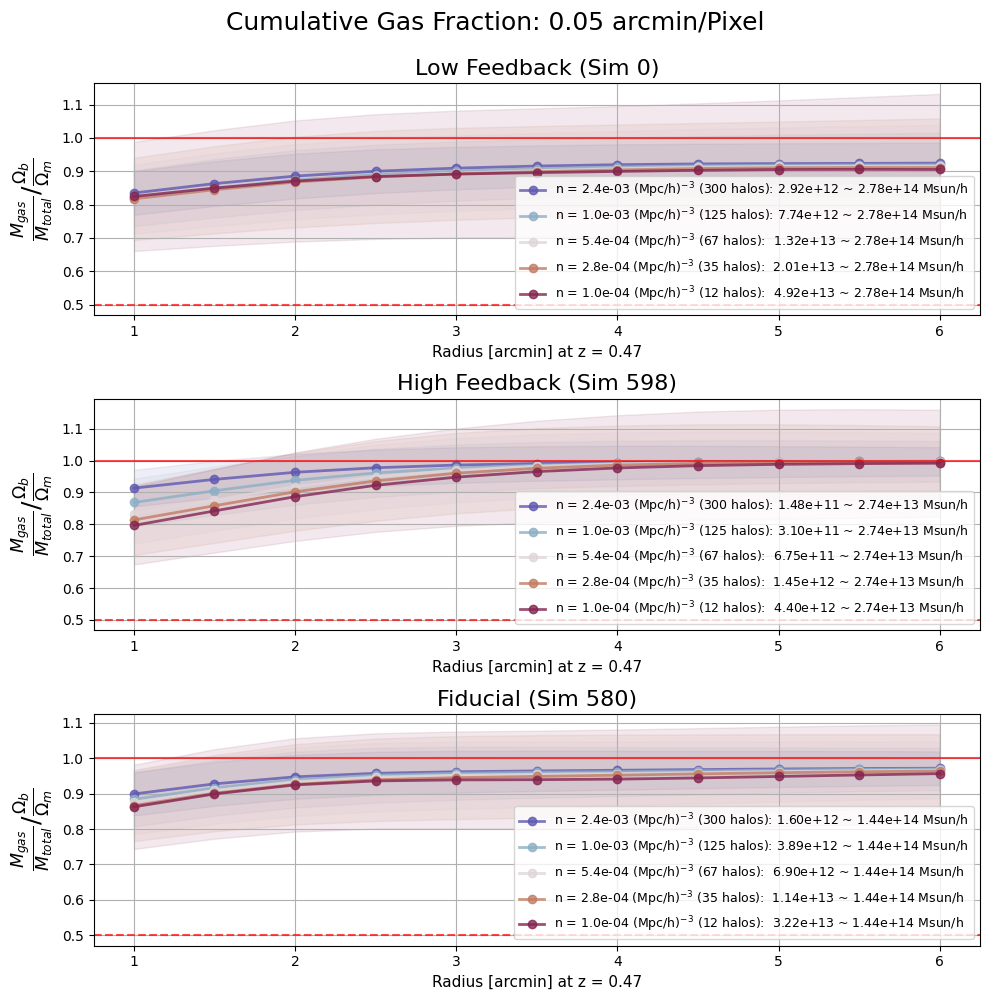

Processing completed in 401.33 seconds


In [14]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# Define cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)


# Define cosmology#
# Plotting calculations
T_CMB = 2.7255
v_c = 300000 / 299792458  # velocity over speed of light
num_halos =  [25, 68, 75, 125, 300]

colourmap = cm.twilight_shifted

fig, axes = plt.subplots(3, 1, figsize=(10, 10))
colors_list = colourmap(np.linspace(0.2, 0.85,  len(number_density)))

for sim_index in range(len(sims)):
    ax = axes[sim_index]
    profiles0_all = profiles0_all_sims[sim_index]
    profiles1_all = profiles1_all_sims[sim_index]
    OmegaB = OmegaBaryons[sim_index]
    OmegaM = OmegaMatters[sim_index]
    
    for i in range(len(number_density)):
        profiles0 = profiles0_all[i]
        profiles1 = profiles1_all[i]

        print(profiles0.shape, profiles1.shape)
        # Calculate profile ratios with error propagation
        profiles_plot = np.mean(profiles0, axis=1) / np.mean(profiles1, axis=1) / (OmegaB / OmegaM)

        # Create plot
        # Use different colors for each plot
        color = colors_list[i]
        
        if sim_index == 0:
            title_label = f'Low Feedback (Sim {sims[sim_index]})'
        elif sim_index == 1:
            title_label = f'High Feedback (Sim {sims[sim_index]})'
        else:
            title_label = f'Fiducial (Sim {sims[sim_index]})'
            
        ax.plot(radii0 * radDistance, profiles_plot, lw=2, ls='-', alpha=0.8, marker='o', color=color, 
                       label=mass_strings[sim_index][i])

        # Calculate error propagation for ratio
        err0 = np.std(profiles0, axis=1) / np.sqrt(profiles0.shape[1])
        err1 = np.std(profiles1, axis=1) / np.sqrt(profiles1.shape[1])
        profiles_err = np.abs(profiles_plot) * np.sqrt(
            (err0 / np.mean(profiles0, axis=1))**2 + 
            (err1 / np.mean(profiles1, axis=1))**2
        )

        upper = profiles_plot + profiles_err
        lower = profiles_plot - profiles_err
        ax.fill_between(radii0 * radDistance, lower, upper, color=color, alpha=0.1)
    ax.axhline(y=0.5, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
    ax.axhline(y=1.0, color='red', linestyle='-', linewidth=1.5, alpha=0.7)

    # Set labels and formatting for each subplot
    ax.set_xlabel(f'Radius [arcmin] at z = 0.47', size=11)
    ax.set_ylabel(r'$\frac{M_{gas}}{M_{total}}/\frac{\Omega_{b}}{\Omega_{m}} $', fontsize=18)
    ax.legend(loc='lower right', fontsize=9)
    ax.grid(True)
    ax.set_title(f'{title_label}', fontsize=16)

fig.suptitle('Cumulative Gas Fraction: 0.05 arcmin/Pixel', fontsize=18, y=0.995)
fig.tight_layout()
plt.show()

print(f'Processing completed in {time.time() - t0:.2f} seconds')

(11, 25) (11, 25)
(11, 67) (11, 67)
(11, 75) (11, 75)
(11, 125) (11, 125)
(11, 300) (11, 300)
(11, 25) (11, 25)
(11, 67) (11, 67)
(11, 75) (11, 75)
(11, 125) (11, 125)
(11, 300) (11, 300)
(11, 25) (11, 25)
(11, 67) (11, 67)
(11, 75) (11, 75)
(11, 125) (11, 125)
(11, 300) (11, 300)


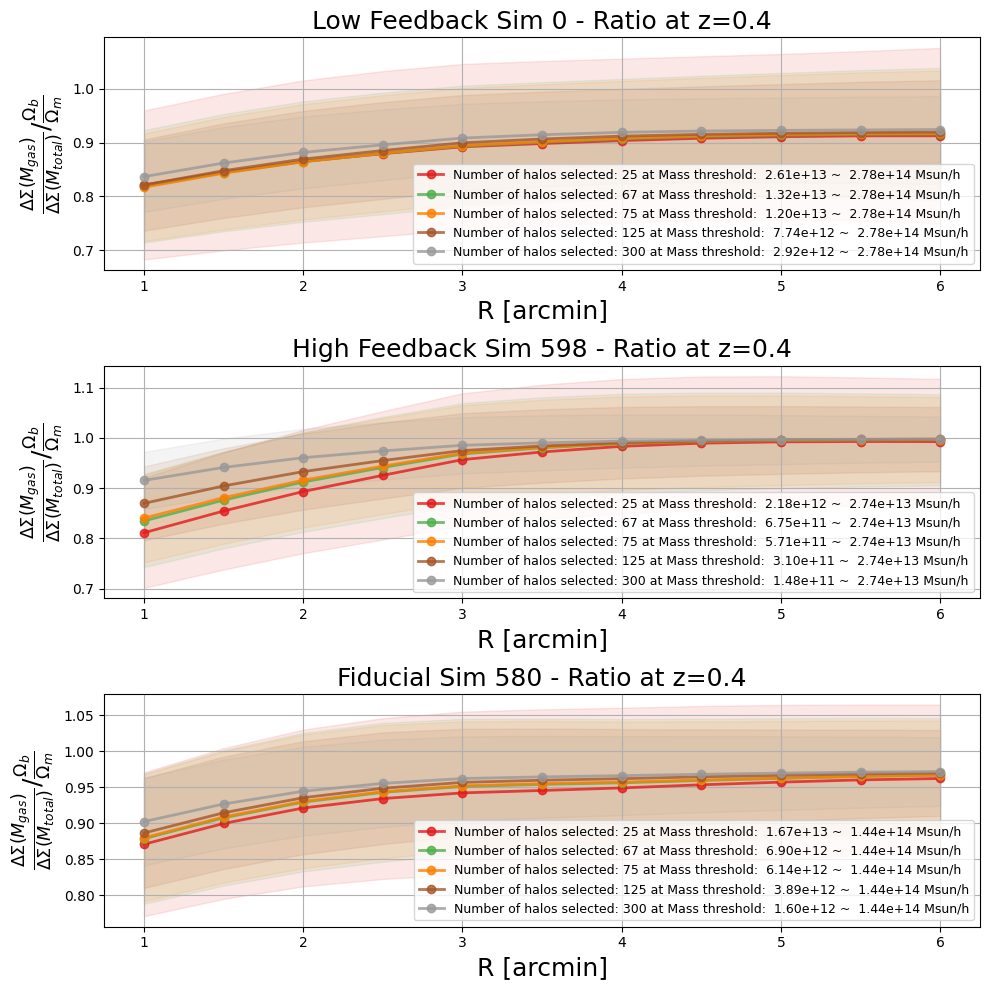

Processing completed in 1696.23 seconds


In [ ]:

# Define cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)


# Define cosmology#
# Plotting calculations
T_CMB = 2.7255
v_c = 300000 / 299792458  # velocity over speed of light
num_halos =  [25, 68, 75, 125, 300]
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
colors_list = plt.cm.Set1(np.linspace(0, 1, len(number_density)))

for sim_index in range(len(sims)):
    ax = axes[sim_index]
    profiles0_all = profiles0_all_sims[sim_index]
    profiles1_all = profiles1_all_sims[sim_index]
    OmegaB = OmegaBaryons[sim_index]
    OmegaM = OmegaMatters[sim_index]
    
    for i in range(len(number_density)):
        profiles0 = profiles0_all[i]
        profiles1 = profiles1_all[i]

        print(profiles0.shape, profiles1.shape)
        # Calculate profile ratios with error propagation
        profiles_plot = np.mean(profiles0, axis=1) / np.mean(profiles1, axis=1) / (OmegaB / OmegaM)

        # Create plot
        # Use different colors for each plot
        color = colors_list[i]
        
        if sim_index == 0:
            title_label = f'Low Feedback (Sim {sims[sim_index]})'
        elif sim_index == 1:
            title_label = f'High Feedback (Sim {sims[sim_index]})'
        else:
            title_label = f'Fiducial (Sim {sims[sim_index]})'
            
        ax.plot(radii0 * radDistance, profiles_plot, lw=2, ls='-', alpha=0.8, marker='o', color=color, 
                       label=mass_strings[sim_index][i])

        # Calculate error propagation for ratio
        err0 = np.std(profiles0, axis=1) / np.sqrt(profiles0.shape[1])
        err1 = np.std(profiles1, axis=1) / np.sqrt(profiles1.shape[1])
        profiles_err = np.abs(profiles_plot) * np.sqrt(
            (err0 / np.mean(profiles0, axis=1))**2 + 
            (err1 / np.mean(profiles1, axis=1))**2
        )

        upper = profiles_plot + profiles_err
        lower = profiles_plot - profiles_err
        ax.fill_between(radii0 * radDistance, lower, upper, color=color, alpha=0.1)

    # Set labels and formatting for each subplot
    ax.set_xlabel('R [arcmin]', fontsize=18)
    ax.set_ylabel(r'$\frac{\Delta \Sigma (M_{gas})}{\Delta \Sigma (M_{total})}/\frac{\Omega_{b}}{\Omega_{m}} $', fontsize=18)
    ax.legend(loc='lower right', fontsize=9)
    ax.grid(True)
    ax.set_title(f'{title_label}', fontsize=16)

fig.tight_layout()
plt.show()

print(f'Processing completed in {time.time() - t0:.2f} seconds')

# kSZ

In [3]:

# Get colormap
colourmap = matplotlib.colormaps[colourmaps[0]]
colours = [colourmap(0.5)]  # Single color since we have one simulation

if verbose:
    print(f"Processing simulation of type: {sim_type}")

profiles0_all_sims = []
profiles1_all_sims = []
OmegaBaryons = []
OmegaMatters = []

for s in sims:
    print(f"Processing simulation: {sim_name} simulation {s}")

    stacker = SimulationStacker(s, snapshot, 
                        simType=sim_type)
    stacker_tot = SimulationStacker(s, snapshot, 
                                simType=sim_type)

    OmegaBaryons.append(stacker.header['OmegaBaryon'])
    OmegaMatters.append(stacker.header['Omega0'])
    
    ## Corresponding to halo number in 50 Mpc/h box: [25, 68, 75, 125, 300]
    profiles0_all = []
    profiles1_all = []
    for n_density in number_density:
        radii0, profiles0 = stacker.stackMap('tau', filterType='CAP', minRadius=1.0, maxRadius=6.0,
                                            save=saveField, load=loadField, radDistance=radDistance, halo_number_density=n_density,
                                            projection=projection,pixelSize=0.1)
        radii1, profiles1 = stacker_tot.stackMap('tau', filterType='CAP', minRadius=1.0, maxRadius=6.0,
                                                save=saveField, load=loadField, radDistance=radDistance, halo_number_density=n_density,
                                                projection=projection, mask=maskHaloes, maskRad=maskRadii)

        profiles0_all.append(profiles0)
        profiles1_all.append(profiles1)

    profiles0_all_sims.append(profiles0_all)
    profiles1_all_sims.append(profiles1_all)


Processing simulation: L50n512_SB35 simulation 0
Box size: 50000.0 kpc/h , Map size at z=0.4674218694859129: 146.16 arcmin
Processed 0 snapshots, time elapsed: 4.51 seconds
Processed 1 snapshots, time elapsed: 8.67 seconds
Processed 2 snapshots, time elapsed: 13.01 seconds
Processed 3 snapshots, time elapsed: 17.37 seconds
Processed 4 snapshots, time elapsed: 20.60 seconds
Processed 5 snapshots, time elapsed: 23.82 seconds
Processed 6 snapshots, time elapsed: 28.09 seconds
Processed 7 snapshots, time elapsed: 32.07 seconds
Processed 8 snapshots, time elapsed: 35.25 seconds
Processed 9 snapshots, time elapsed: 39.17 seconds
Processed 10 snapshots, time elapsed: 42.38 seconds
Processed 11 snapshots, time elapsed: 45.96 seconds
Processed 12 snapshots, time elapsed: 50.25 seconds
Processed 13 snapshots, time elapsed: 53.89 seconds
Processed 14 snapshots, time elapsed: 57.48 seconds
Processed 15 snapshots, time elapsed: 60.54 seconds
hist2d time: 60.537386655807495
Number of halos selected:

In [ ]:
# Save data in a format that handles variable array sizes
save_data = {}
save_data['radii0'] = radii0
save_data['number_density'] = number_density
save_data['sims'] = sims
save_data['mass_strings'] = np.array(mass_strings, dtype=object)

# Save tau and total profiles separately for each sim and density
for sim_idx, sim_id in enumerate(sims):
    for density_idx, density in enumerate(number_density):
        key0 = f'pixelSize_0.1'
        key1 = f'pixelSize_0.5'
        save_data[key0] = profiles0_all_sims[sim_idx][density_idx]
        save_data[key1] = profiles1_all_sims[sim_idx][density_idx]

np.savez(
    f"CAMELS_{sim_name}_tau_CAP_profiles_low_high_fiducial_feedback_small_default_pixelSize.npz",
    **save_data
) 

In [ ]:
# Load the saved data
loaded_data = np.load(f"CAMELS_{sim_name}_tau_CAP_profiles_low_high_fiducial_feedback_small_default_pixelSize.npz")

# Extract the basic arrays
radii0 = loaded_data['radii0']
number_density = loaded_data['number_density']
sims = loaded_data['sims']

# Reconstruct the profiles arrays
profiles0_all_sims = []
profiles1_all_sims = []

for sim_idx, sim_id in enumerate(sims):
    profiles0_all = []
    profiles1_all = []
    
    for density_idx, density in enumerate(number_density):
        key0 = f'pixelSize_0.1'
        key1 = f'pixelSize_0.5'
        
        profiles0_all.append(loaded_data[key0])
        profiles1_all.append(loaded_data[key1])
    
    profiles0_all_sims.append(profiles0_all)
    profiles1_all_sims.append(profiles1_all)

print(f"Loaded {key0} and {key1} data for {len(sims)} simulations with {len(number_density)} density bins")

In [32]:
profiles1 = ksz_from_delta_sigma(profiles1 * u.Msun / u.pc**2, redshift, delta_sigma_is_comoving=True, cosmology=cosmo) # convert to kSZ


In [17]:
DESI_data = np.load('Fig1_Fig8_dr10_allfoot_perbin_sigmaz0.0500_dr6_corr_pzbin1.npz')
print(DESI_data.keys())

KeysView(NpzFile 'Fig1_Fig8_dr10_allfoot_perbin_sigmaz0.0500_dr6_corr_pzbin1.npz' with keys: theta_arcmins, prof, cov)


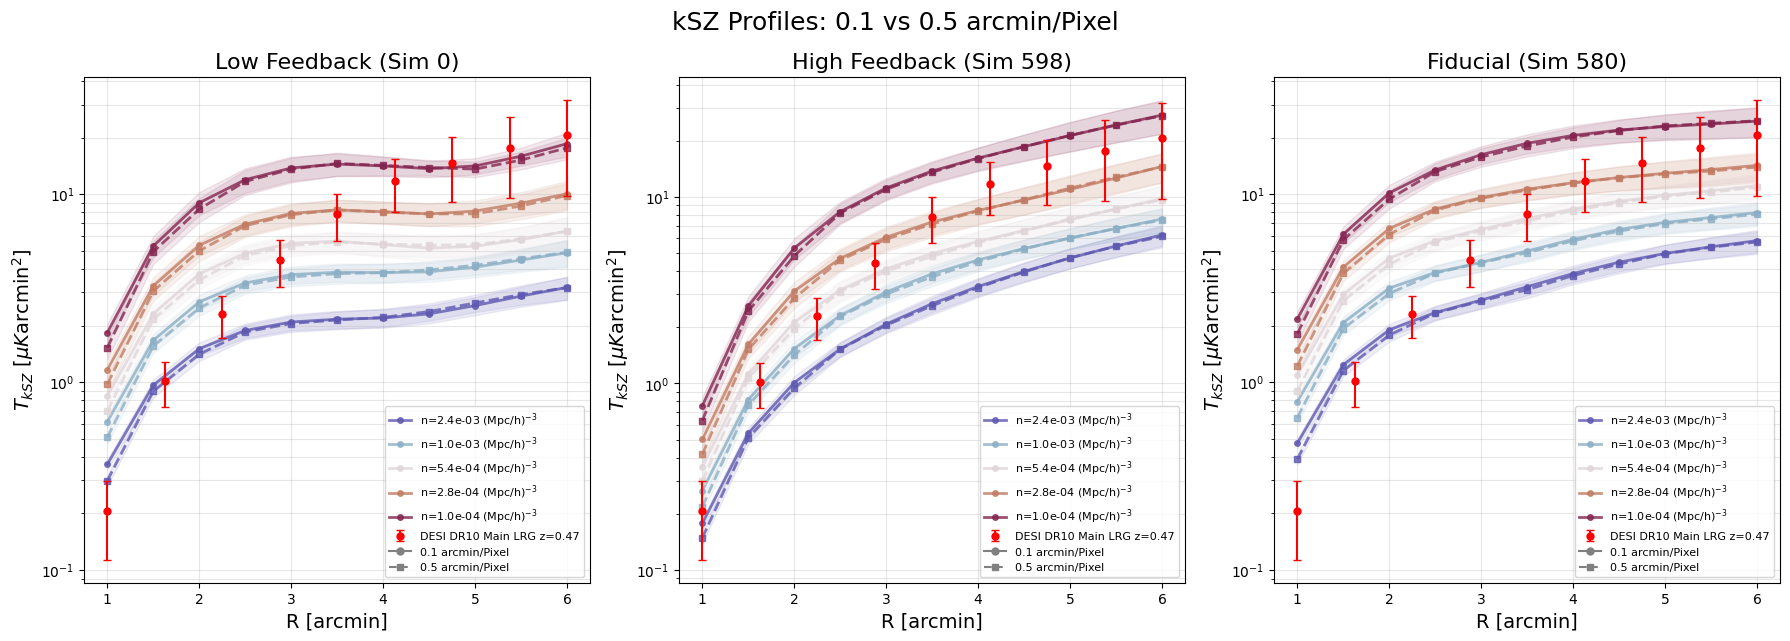

In [35]:
import matplotlib.cm as cm
from matplotlib.lines import Line2D

# Create colormap for number density
colourmap = cm.twilight_shifted
colours = colourmap(np.linspace(0.2, 0.85, len(number_density)))

# Different line styles for pixel sizes
linestyles = ['-', '--']  # solid for 0.1 arcmin/pixel, dashed for 0.5 arcmin/pixel
markers = ['o', 's']  # circle for 0.1, square for 0.5
pixel_sizes = [0.1, 0.5]
profile_sets = [profiles0_all_sims, profiles1_all_sims]
labels_pixel = ['0.1 arcmin/Pixel', '0.5 arcmin/Pixel']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for sim_index in range(len(sims)):
    ax = axes[sim_index]
    
    if sim_index == 0:
        title_label = f'Low Feedback (Sim {sims[sim_index]})'
    elif sim_index == 1:
        title_label = f'High Feedback (Sim {sims[sim_index]})'
    else:
        title_label = f'Fiducial (Sim {sims[sim_index]})'
    
    # Iterate over pixel sizes (profiles0_all_sims and profiles1_all_sims)
    for ps_idx, profiles_set in enumerate(profile_sets):
        profiles_all = profiles_set[sim_index]
        
        # Iterate over number densities
        for i in range(len(number_density)):
            profiles = profiles_all[i]
            color = colours[i]
            ls = linestyles[ps_idx]
            marker = markers[ps_idx]
            
            # Calculate mean and std
            profiles_plot = np.mean(profiles, axis=1)
            profiles_err = np.std(profiles, axis=1) / np.sqrt(profiles.shape[1])
            
            # Create label - only show once per combination
            if ps_idx == 0:  # Only label for 0.1 arcmin/pixel
                label = f'n={number_density[i]:.1e} (Mpc/h)$^{{-3}}$'
            else:
                label = None
            
            # Plot
            ax.plot(radii0 * radDistance, profiles_plot, lw=2, ls=ls, alpha=0.8, 
                   marker=marker, markersize=4, color=color, label=label)
            
            # Fill between for uncertainty
            upper = profiles_plot + profiles_err
            lower = profiles_plot - profiles_err
            ax.fill_between(radii0 * radDistance, lower, upper, color=color, alpha=0.1)
    
    # Add DESI data to all plots
    ax.errorbar(DESI_data['theta_arcmins'], DESI_data['prof'], 
               yerr=np.sqrt(DESI_data['cov'].diagonal()), 
               fmt='o', capsize=3, capthick=1, linewidth=1.5, markersize=5, 
               color='red', label='DESI DR10 Main LRG z=0.47', zorder=4)
    
    # Create custom legend with organized sections
    handles, labels = ax.get_legend_handles_labels()
    
    # Add custom handles for pixel size styles
    style_handles = [
        Line2D([0], [0], color='gray', ls='-', marker='o', markersize=5, label='0.1 arcmin/Pixel'),
        Line2D([0], [0], color='gray', ls='--', marker='s', markersize=5, label='0.5 arcmin/Pixel')
    ]
    
    # Combine: first DESI, then density labels, then style labels
    all_handles = handles + style_handles
    all_labels = labels + ['0.1 arcmin/Pixel', '0.5 arcmin/Pixel']
    
    ax.set_xlabel('R [arcmin]', fontsize=14)
    ax.set_ylabel(r'$T_{kSZ}$ [$\mu K \rm{arcmin}^2$]', fontsize=14)
    ax.set_yscale('log')
    ax.legend(handles=all_handles, labels=all_labels, loc='lower right', fontsize=8, ncol=1)
    ax.grid(True, alpha=0.3, which='both')
    ax.set_title(title_label, fontsize=16)
    ax.set_box_aspect(1)

fig.suptitle('kSZ Profiles: 0.1 vs 0.5 arcmin/Pixel', fontsize=18, y=1.02)
fig.tight_layout()
plt.show()


In [30]:
DESI_data['prof'].mean()

np.float32(8.9428215)